In [63]:
import cvxpy as cp
import numpy as np
import mosek
import matplotlib.pyplot as plt


Uma alternativa para definir se um dado ponto $ u $ está dentro do politopo definido pelo conjunto de vértices $ {v_i, i=1,\dots,N} $ é testando se $u$ pode ser escrito como combinação convexa de ${v_i}$. Isso nos levaria a resolver, para cada amostra do método de Monte Carlo, um problema de factibilidade de $N$ variáveis ${\lambda_i}$, tal que

$$ \text{encontrar } \lambda_i: \hspace{10pt} u = \sum_{i=0}^N \lambda_i v_i \hspace{10pt} \text{sujeito a:} \hspace{10pt} \lambda_i \geq 0 \hspace{3pt} \forall i, \hspace{10pt} \sum_{i=0}^N \lambda_i = 1 $$

A princípio, isso me parece custoso (mas posso estar enganado). Uma outra alternativa seria o algoritmo de ray casting ou ray tracing. Nele, traçamos uma reta em uma direção qualquer entre o ponto e a borda da área contendo o polígono. Podemos então calcular os pontos de interseção entre essa reta e cada uma das arestas do polígono: se o total de interseções for ímpar, o ponto é interior ao polígono, e o contrário se o total for par. Este método tem a vantagem de funcionar para polígonos não convexos, e ao menos a princípio parece menos custoso computaioncalmente do que o método de factibilidade. 

## Questão 2:

In [64]:
def RayCastingMonteCarlo(vertices:np.ndarray, nbSamples:int):

    counts = 0
    samples = np.zeros((nbSamples, 2))

    for i in range(nbSamples):

        sample = np.random.rand(2) 
        samples[i] = sample
        n = len(vertices)

        for j in range(n):

            vertex1 = vertices[j]
            vertex2 = vertices[(j+1) % n]

            if (vertex1[1] <= sample[1] <= vertex2[1]) or (vertex2[1] <= sample[1] <= vertex1[1]):
                xIntersect = vertex1[0] + (sample[1] - vertex1[1]) * (vertex2[0] - vertex1[0]) / (vertex2[1] - vertex1[1])
                if sample[0] < xIntersect:
                    counts += 1


    return counts/nbSamples, samples


# Defining some simple shapes for testing
verticesSimpleTriangle = np.array([[0, 0], [0, 1], [1, 0]])
verticesSimpleRectangle = np.array([[0, 0], [0, 0.2], [1, 0.2], [1, 0]])

# Defining polygon for question 3
q3Polygon = np.array([
    [0.0623, 0.9478],
    [0.9279, 0.9185],
    [0.6410, 0.1372],
    [0.2153, 0.1420],
    [0.0119, 0.4632]
])

In [65]:
nbSamplesList = [100, 1000, 10000]

print("Estimated area for simple triangle in function of sample number: ")
for nbSamples in nbSamplesList:
    area, samples = RayCastingMonteCarlo(vertices=verticesSimpleTriangle, nbSamples=nbSamples)
    print("samples: {} | area: {}".format(nbSamples, area))

print("")
print("Estimated area for simple rectangle in function of sample number: ")
for nbSamples in nbSamplesList:
    area, samples = RayCastingMonteCarlo(vertices=verticesSimpleRectangle, nbSamples=nbSamples)
    print("samples: {} | area: {}".format(nbSamples, area))

Estimated area for simple triangle in function of sample number: 
samples: 100 | area: 0.51
samples: 1000 | area: 0.473
samples: 10000 | area: 0.5001

Estimated area for simple rectangle in function of sample number: 
samples: 100 | area: 0.22
samples: 1000 | area: 0.21
samples: 10000 | area: 0.1992


Podemos observar que uma amostragem maior não necessariamente implica em uma estimativa melhor todas as vezes, visto que se trata de um processo aleatório. No entanto, ainda podemos concluir que existe uma tendência de melhora nas estimativas em função do número de amostras: rodando esse experimento várias vezes poderíamos ver que o desvio padrão nos valores das estimativas seriam muito maiores no caso de M baixo, em comparação a M grande. 

0.4998


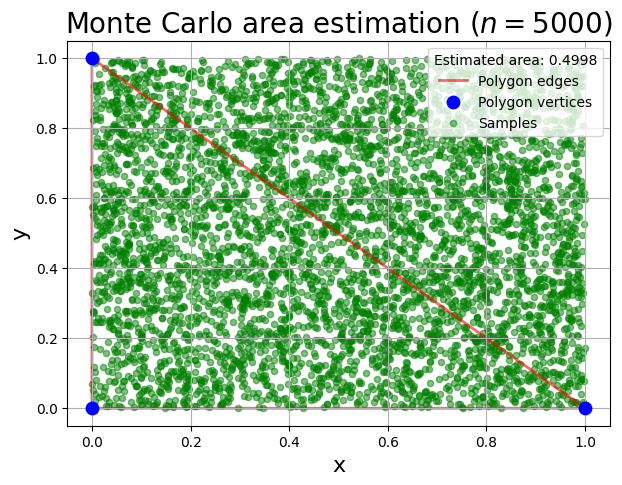

In [66]:
nbSamples = 5000
area, samples = RayCastingMonteCarlo(vertices=verticesSimpleTriangle, nbSamples=nbSamples)
print(area)


# Extract coordinates
x_poly, y_poly = verticesSimpleTriangle[:, 0], verticesSimpleTriangle[:, 1]
x_extra, y_extra = samples[:, 0], samples[:, 1]

# Create a new figure with a custom size
plt.figure(figsize=(7, 5))  # Set width=8 inches and height=6 inches

# Plot the polygon edges with transparency
plt.plot(np.append(x_poly, x_poly[0]), np.append(y_poly, y_poly[0]), 'r-', linewidth=2, alpha=0.6, label="Polygon edges", zorder=1)

# Plot polygon vertices
plt.scatter(x_poly, y_poly, color='blue', marker='o', s=80, label="Polygon vertices", zorder=2)

# Plot additional points in green
plt.scatter(x_extra, y_extra, color='green', marker='o', s=20, label="Samples", alpha = 0.5, zorder=0)

# Labels and formatting
plt.xlabel("x", size=16)
plt.ylabel("y", size=16)
plt.title("Monte Carlo area estimation ($n={}$)".format(nbSamples), size=20)
plt.legend(loc='upper right', title='Estimated area: {}'.format(area))
plt.grid(True, zorder=0) 
plt.show()

0.2082


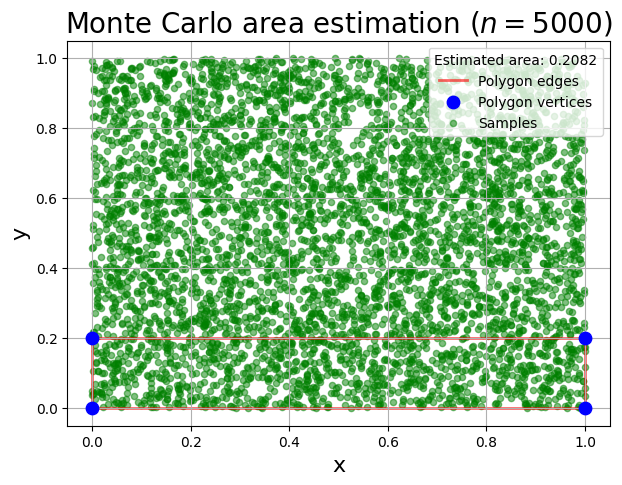

In [67]:
nbSamples = 5000
area, samples = RayCastingMonteCarlo(vertices=verticesSimpleRectangle, nbSamples=nbSamples)
print(area)

# Extract coordinates
x_poly, y_poly = verticesSimpleRectangle[:, 0], verticesSimpleRectangle[:, 1]
x_extra, y_extra = samples[:, 0], samples[:, 1]

# Create a new figure with a custom size
plt.figure(figsize=(7, 5))  # Set width=8 inches and height=6 inches

# Plot the polygon edges with transparency
plt.plot(np.append(x_poly, x_poly[0]), np.append(y_poly, y_poly[0]), 'r-', linewidth=2, alpha=0.6, label="Polygon edges", zorder=1)

# Plot polygon vertices
plt.scatter(x_poly, y_poly, color='blue', marker='o', s=80, label="Polygon vertices", zorder=2)

# Plot additional points in green
plt.scatter(x_extra, y_extra, color='green', marker='o', s=20, label="Samples", alpha = 0.5, zorder=0)

# Labels and formatting
plt.xlabel("x", size=16)
plt.ylabel("y", size=16)
plt.title("Monte Carlo area estimation ($n={}$)".format(nbSamples), size=20)
plt.legend(loc='upper right', title='Estimated area: {}'.format(area))
plt.grid(True)
plt.show()

## Questão 3:

In [68]:
nbSamples = 10000
area, samples = RayCastingMonteCarlo(vertices=q3Polygon, nbSamples=nbSamples)
print(area)

0.6803


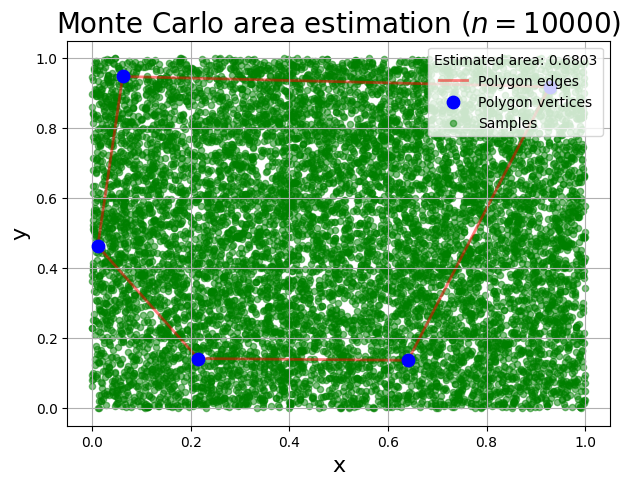

In [69]:
# Extract coordinates
x_poly, y_poly = q3Polygon[:, 0], q3Polygon[:, 1]
x_extra, y_extra = samples[:, 0], samples[:, 1]

# Create a new figure with a custom size
plt.figure(figsize=(7, 5))  # Set width=8 inches and height=6 inches

# Plot the polygon edges with transparency
plt.plot(np.append(x_poly, x_poly[0]), np.append(y_poly, y_poly[0]), 'r-', linewidth=2, alpha=0.5, label="Polygon edges", zorder=1)

# Plot polygon vertices
plt.scatter(x_poly, y_poly, color='blue', marker='o', s=80, label="Polygon vertices", zorder=2)

# Plot additional points in green
plt.scatter(x_extra, y_extra, color='green', marker='o', s=20, label="Samples", alpha = 0.5, zorder=0)

# Labels and formatting
plt.xlabel("x", size=16)
plt.ylabel("y", size=16)
plt.title("Monte Carlo area estimation ($n={}$)".format(nbSamples), size=20)
plt.legend(loc='upper right', title='Estimated area: {}'.format(area))
plt.grid(True)
plt.show()

## Questão 4:

Sem o ordenamento dos vértices, não temos informação suficiente para construir um polígono sem ambiguidades. Teríamos um número extremamente elevado de possibilidades de formas geométricas possíveis, muitas delas não convexas ou até disjuntas. Isso, além de dificultar a execução do algoritmo de ray casting, simplesmente não nos permitiria chegar no objetivo proposto. 

No entanto, se tivermos a hipótese adicional de que o polígono é necesssariamente convexo, o primeiro método proposto ainda funcionaria, pois não depende de um ordenamento específico dos vértices. 

## Questão 5:

O método das combinações convexas não funcionaria em um polígono não convexo, visto que neste caso um ponto fora do polígono mas dentro de sua casca convexa seria contabilizado como interno. O segundo método de ray casting é mais adequado para polígonos não convexos, visto que em qualquer situação, um número ímpar de interseções com as arestas (desde que sejam devidamente construídas a partir da lista ordenada de vértices) sempre ocorre com pontos interiores, e o contrário para números pares de interseção e pontos exteriores. 